In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<font size='3' color='blue'>
What is a 5-number Summary
<br>    
<br>    
> Descriptive Statistics. <br>
> Used during the preliminary investigation of a large data set.  <br>
> A summary consists of five values: the maximum and minimum values, the lower and upper quartiles, and the median. <br>
> Ordered from lowest to highest: minimum value, lower quartile (Q1), median value (Q2), upper quartile (Q3), maximum value. <br>
> Instant insight into the central tendency and dispersion of a variable<br>
> Represented in a diagram known as a box plot. <br>

</font>

In [74]:
minval = 1
maxval = 20
N      = 20
x      = np.random.randint(minval, maxval+1, N)

In [102]:
x

array([  6,   5,   9,   1,  17,   4,   2,  15,  14,   3,  15,   3,   6,
        12,   7,   8,  19,  19,   3,   1, -12,  40, -50,  70])

In [76]:
df = pd.DataFrame(x, columns=['x'])
df.head()

,x
0,6
1,5
2,9
3,1
4,17


In [77]:
df.describe()

,x
count,20.000000
mean,8.450000
std,6.125658
min,1.000000
25%,3.000000
50%,6.500000
75%,14.250000
max,19.000000


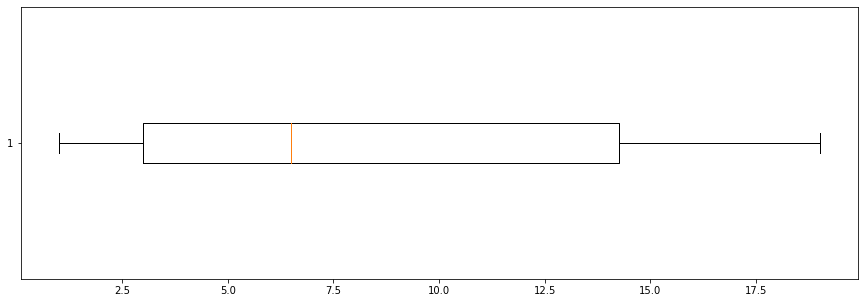

In [78]:
plt.figure(figsize=(15,5))
plt.boxplot(x, vert=False)
plt.show()

In [79]:
np.min(x), np.max(x), np.percentile(x, 25), np.quantile(x, .25), np.median(x), np.percentile(x, 50), np.quantile(x, .5)

(1, 19, 3.0, 3.0, 6.5, 6.5, 6.5)

In [80]:
np.percentile(x, 75), np.quantile(x, .75)

(14.25, 14.25)

In [81]:
Q1 = np.percentile(x,25)
Q3 = np.percentile(x,75)
IQR = Q3 - Q1

In [82]:
IQR

11.25

In [83]:
13.75 - 5.25

8.5

In [84]:
Q3 + IQR*1.5

31.125

In [85]:
Q1 - IQR*1.5

-13.875

In [86]:
x

array([ 6,  5,  9,  1, 17,  4,  2, 15, 14,  3, 15,  3,  6, 12,  7,  8, 19,
       19,  3,  1])

In [87]:
x = np.append(x, [-12, 40])

In [88]:
x

array([  6,   5,   9,   1,  17,   4,   2,  15,  14,   3,  15,   3,   6,
        12,   7,   8,  19,  19,   3,   1, -12,  40])

In [89]:
df = pd.DataFrame(x, columns=['x'])
df.describe()

,x
count,22.000000
mean,8.954545
std,10.049768
min,-12.000000
25%,3.000000
50%,6.500000
75%,14.750000
max,40.000000


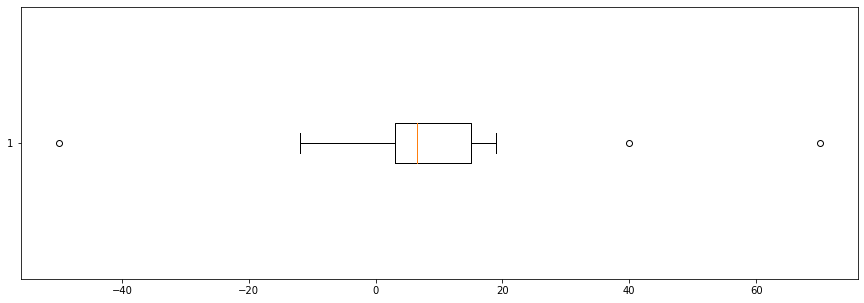

In [129]:
plt.figure(figsize=(15,5))
plt.boxplot(x, vert=False)
plt.show()

In [94]:
Q1 = np.percentile(x,25)
Q3 = np.percentile(x,75)
IQR = Q3 - Q1

In [95]:
IQR

11.75

In [96]:
Q1

3.0

In [97]:
Q1 - IQR*1.5

-14.625

In [98]:
x = np.append(x, [-50, 70])

In [99]:
x

array([  6,   5,   9,   1,  17,   4,   2,  15,  14,   3,  15,   3,   6,
        12,   7,   8,  19,  19,   3,   1, -12,  40, -50,  70])

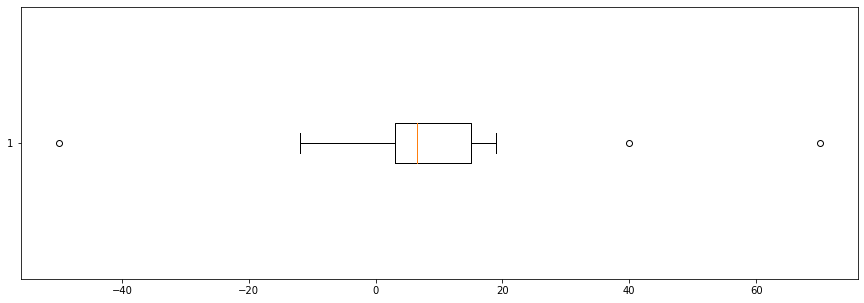

In [130]:
plt.figure(figsize=(15,5))
plt.boxplot(x, vert=False)
plt.show()

In [101]:
def showData(from_ =min(x), to_=max(x)) :   # both inclusive
    global x
    x = np.array(sorted(x))
    return x[(x>= from_) & (x <= to_)]

In [131]:
showData(np.percentile(x, 25))

array([ 3,  3,  3,  4,  5,  6,  6,  7,  8,  9, 12, 14, 15, 15, 17, 19, 19,
       40, 70])

In [132]:
showData(np.percentile(x, 25), np.percentile(x, 50))

array([3, 3, 3, 4, 5, 6, 6])

In [133]:
showData(np.percentile(x, 25), np.percentile(x, 75))

array([ 3,  3,  3,  4,  5,  6,  6,  7,  8,  9, 12, 14, 15, 15])

In [134]:
showData(np.percentile(x, 75))

array([15, 15, 17, 19, 19, 40, 70])

In [135]:
def showOutliers(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower_outliers = Q1 - IQR  * 1.5
    upper_outliers = Q3 + IQR  * 1.5
    x = np.array(sorted(x))
    lower, upper = list(x[x < lower_outliers]), list(x[x > upper_outliers])
    return lower, upper

In [136]:
showOutliers(x)

([-50], [40, 70])

In [137]:
data = sns.load_dataset('tips')

In [138]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


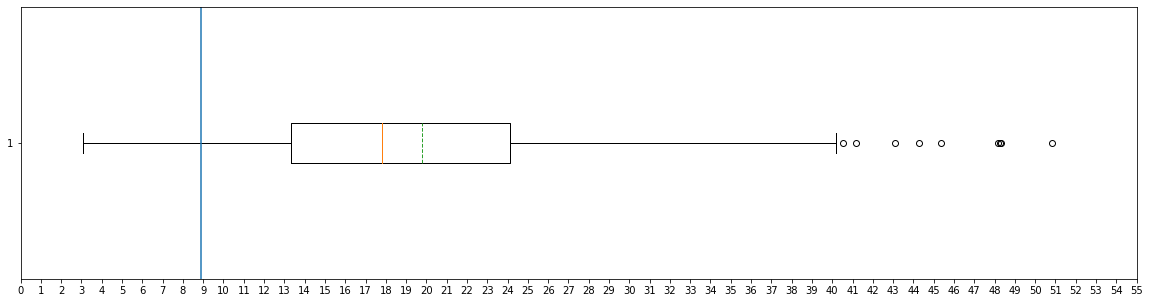

In [139]:
plt.figure(figsize=(20,5))
x1 = plt.boxplot([data.total_bill], vert=False, showmeans=True, meanline=True )
plt.xticks(range(0,56))
plt.axvline(np.std(data.total_bill))
plt.show()

In [140]:
np.std(data.total_bill)

8.884150577771132

In [141]:
showOutliers(data.total_bill)

([], [40.55, 41.19, 43.11, 44.3, 45.35, 48.17, 48.27, 48.33, 50.81])

In [72]:
showOutliers(x)

([-50], [40, 70])

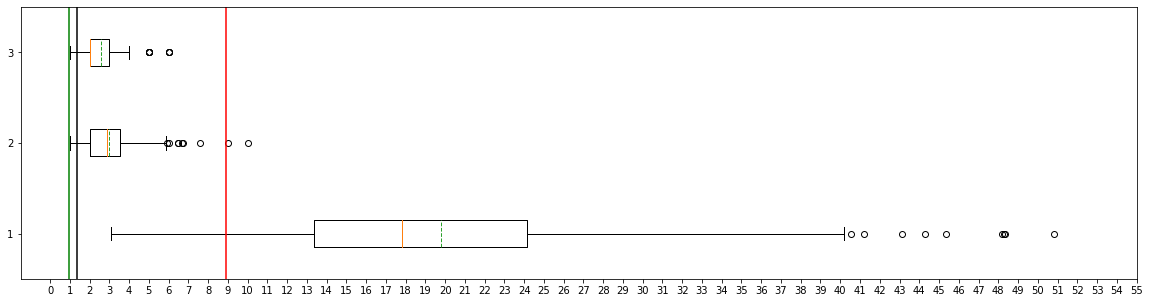

In [146]:
plt.figure(figsize=(20,5))
x1 = plt.boxplot([data.total_bill, data.tip, data['size']], vert=False, showmeans=True, meanline=True )
plt.xticks(range(0,56))
plt.axvline(np.std(data.total_bill), color='r')
plt.axvline(np.std(data.tip), color='k')
plt.axvline(np.std(data['size']), color='g')
plt.show()

In [147]:
np.unique(data['size'])

array([1, 2, 3, 4, 5, 6], dtype=int64)